# Perceptron: Explanation, Implementation and a Visual Example
### Understanding the building block of Neural Networks
![alt text](nerve-cell.jpg)
<center>Imagine de <a href="https://pixabay.com/ro/users/ColiN00B-346653/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2213009">Colin Behrens</a> de la <a href="https://pixabay.com/ro/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2213009">Pixabay</a></center>

The perceptron is the building block of artificial neural networks, it is a simplified model of the biological neurons in our brain. A perceptron is the simplest neural network, one that is comprised of just one neuron. The perceptron algorithm was invented in 1958 by Frank Rosenblatt.
  
Below is an illustration of a biological neuron:  
  
<img src="imgs/neuron.png" width="400"/>  
  
The majority of input signal to a neuron is received via the dendrites. There are about 1,000 to 10,000 connections that are formed by other neurons to these dendrites. The signal from the connections, called synapses, propagate through the dendrite into the cell body. The potential increases in the cell body and once it reaches a threshold, the neuron sends a spike along the axon that connects to roughly 100 other neurons through the axon terminal.  
  
The perceptron is a simplified model of the real neuron that attempts to imitate it by the following process: it takes the input signals, let's call them $x_1$, $x_2$, ..., $x_n$, computes a weighted sum **z** of those inputs, then passes it through a threshold function $\phi$ and outputs the result.  

$$z = \sum_{i=1}^n x_iw_i$$  

$$
\phi(z) = 
\left\{
\begin{array}{ll}
    -1 & z\leq w_0 \\
    1 & z\gt w_0 \\
\end{array}
\right.
$$  
  
But having $w_0$ as threshold is the same thing as adding $w_0$ to the sum as bias and having instead a threshold of 0. That is, we consider an additional input signal $x_0$ that is always set to 1.
  
Here is represented a perceptron:  
  
<img src="imgs/perceptron.png" width="400"/>  
  
$$z = \sum_{i=0}^n x_iw_i$$  

$$
\phi(z) = 
\left\{
\begin{array}{ll}
    -1 & z\leq 0 \\
    1 & z\gt 0 \\
\end{array}
\right.
$$  
  
To use vector notation, we can put all inputs $x_0$, $x_1$, ..., $x_n$, and all weights $w_0$, $w_1$, ..., $w_n$ into vectors $x$ and $w$, and output 1 when their dot product is positive and -1 otherwise.  
  
$$x = \begin{bmatrix}1 \\x_1\\ ...\\ x_n \end{bmatrix}; \quad w = \begin{bmatrix}w_0 \\w_1\\ ...\\ w_n \end{bmatrix}$$  
  
$$z = x \cdot w$$  
  
Here is a geometrical representation of this using only 2 inputs $x_1$ and $x_2$, so that we can plot it in 2 dimensions.  
  
<img src="imgs/decision_boundary.png" width="400"/>  
  
As you see above, the decison boundary of a perceptron with 2 inputs is a line. If there were 3 inputs the decision boundary were a 2-d plane. In general, if we have n inputs the decision boundary will be a n-1 dimensional object called a hyperplane that separates our n-dimensional feature space into 2 parts: one in which the points are classified as positive, and one in which the points are classified as negative(by convention, we will consider points that are exactly on the decision boundary as being negative). Hence the perceptron is a binary classifier that is linear in terms of its weights.  
In the image above **w'** represents the weights vector without the bias term $w_0$. **w'** has the property that it is perpendicular to the decision boundary and points towards the posetively classified points. This vector determines the slope of the decision boundary, and the bias term $w_0$ determines the offset of the decision boundary along the **w'** axis.  

So far we talked about how a perceptron takes a decision based on the input signals and its weights. But how a perceptron actually learns? How to find the right set of parameters $w_0$, $w_1$, ..., $w_n$ in order to make a good classification?  
The perceptron algorithm is an iterative algorithm that is based on the following simple update rule:  
  
$$\text{if } y(x \cdot w) \leq 0:\\ \quad w = w + yx$$  
  
Where y is the label (either -1 or +1) of our current data point **x**, and **w** is the weights vector.  
What our update rule says? The dot product $x \cdot w$ is just the perceptron's prediction based on the current weights (its sign is the same with the one of the predicted label). The expression $y(x \cdot w)$ can be less than or equal to 0 only if the real label y is different than the predicted label $\phi(x \cdot w)$. So, if there is a mismatch between the true and predicted labels, then we update our weights: **w = w+yx**; otherwise, we let them as they are.  
So, why the **w = w + yx** update rule works. It attempts to push the value of $y(x \cdot w)$ in the if condition towards the positive side of 0, and thus classifying x correctly. And if the dataset is linearly separable, by doing this update rule for each point for a certain number of iterations, the weights will eventually converge to a state in which every point is correctly classified. Let's see what's the effect of the update rule by reevaluating the if condition after the update:  
  
$$
\begin{align}
y(x \cdot w_{new}) &= y\left(x \cdot \left(w_{old} + yx\right)\right)\\
&= y\left(x \cdot w_{old} + y\Vert x \Vert^{2}\right)\\
&= y(x \cdot w_{old}) + y^2\Vert x \Vert^{2}\\
&= y(x \cdot w_{old}) + \Vert x \Vert^{2}
\end{align}
$$  
  
$$
\text{As } \Vert x \Vert^{2} \geq 0 => y(x \cdot w_{old}) \leq y(x \cdot w_{new})
$$  
  
That is, after the weights update for a particular data point the expression in the if condition should be closer to being positive, and thus correctly classified.  
The full perceptron algorithm in pseudocode is here:  
  
$$
\begin{align}
&w = 0\\
&\text{for i=1 to NumberOfIterations:}\\
&\quad \text{for each data point (x, y):}\\
&\quad \quad \text{if } y(x \cdot w) \leq 0:\\
&\quad \quad \quad w = w + yx
&\end{align}
$$

## Now let's implement it in Python
![alt text](imgs/python_numpy.png)

We will now implement the perceptron algorithm from scratch in python using only numpy as external library for matrix-vector operations. We will implement it as a class that has an interface similar to other classifiers in common machine learning packages like Sci-kit Learn. We will implement for this class 3 methods: `.fit()`, `.predict()`, and `.score()`.  
  
The `.fit()` method will be used for training the perceptron. It expects as the first parameter a 2-d numpy array **X**. The rows of this array are samples from our dataset, and the columns are the features. The second parameter, **y**, should be a 1-d numpy array that contains the labels for each row of data in **X**. The third parameter, **n_iter**, is the number of iterations for which we let the algorithm run.  
  
```python
def fit(self, X, y, n_iter=100):
        
    n_samples = X.shape[0]
    n_features = X.shape[1]

    # Add 1 for the bias term
    self.weights = np.zeros((n_features+1,))

    # Add column of 1s
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                self.weights += y[j]*X[j, :]
```

The `.predict()` method will be used for predicting labels of new data. It first checks if the weights object attribute exists, if not this means that the perceptron is not trained yet, and we show a warning message and return. It expects one parameter, **X**, of the same shape as in the `.fit()` method. Then we just do a matrix multiplication between **X** and the weights, and map them to either -1 or +1. We use `np.vectorize()` to apply this mapping to all elements in the resulting vector of matrix multiplication.  
  
```python
def predict(self, X):
    if not hasattr(self, 'weights'):
        print('The model is not trained yet!')
        return

    n_samples = X.shape[0]
    # Add column of 1s
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    y = np.matmul(X, self.weights)
    y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)

    return y
```

The `.score()` method computes and returns the accuracy of the predictions. It expects as parameters an input matrix **X** and a labels vector **y**.  
  
```python
def score(self, X, y):
    pred_y = self.predict(X)

    return np.mean(y == pred_y)
```

Below is the full code:

In [1]:
import numpy as np

class Perceptron:    
    def fit(self, X, y, n_iter=100):
        
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
    
    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)

## A few examples

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def plot_data_points(ax, X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])

def plot_decision_boundary(ax, clf, X, p):
    X_cpy = X.copy()
    margin = 0.5
    x_min = np.min(X_cpy[:, 0])-margin
    x_max = np.max(X_cpy[:, 0])+margin
    y_min = np.min(X_cpy[:, 1])-margin
    y_max = np.max(X_cpy[:, 1])+margin
    n = 1000
    x = np.linspace(x_min, x_max, num=n)
    y = np.linspace(y_min, y_max, num=n)
    x, y = np.meshgrid(x, y)
    X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
    X_cpy = polynomial_features(X_cpy, p)
    z = clf.predict(X_cpy)
    z = z.reshape((n, n))
    ax.contour(x, y, z, levels=[0])

In [4]:
def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)

In [5]:
def anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level):
    clf = Perceptron()
    clf.weights = weights

    plt.clf()
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(16,6))
    
    if iteration_level:
        plot_data_points(ax_train, X_train, y_train)
    else:
        mask = np.ones((n_samples,), dtype=bool)
        mask[j] = False
        plot_data_points(ax_train, X_train[mask, :], y_train[mask])
        ax_train.scatter(X_train[j, 0], X_train[j, 1], c='lime')
    
    plot_data_points(ax_test, X_test, y_test)

    plot_decision_boundary(ax_train, clf, X, p)
    plot_decision_boundary(ax_test, clf, X, p)

    ax_train.set_title('Train')
    ax_test.set_title('Test')

    if iteration_level:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}', fontsize=14)
    else:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}; Point: {j+1}/{n_samples}', fontsize=14)
    k = i if iteration_level else i*n_samples+j
    plt.savefig(f'{out_folder}/frame{k}.png')
    plt.close(fig)

def perceptron_anim(X, y, X_train, y_train, X_test, y_test, out_folder, iteration_level, p=1, n_iter=100):

    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]

    weights = np.zeros((n_features+1,))

    X_train = np.concatenate([X_train, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y_train[j]*np.dot(weights, X_train[j, :]) <= 0:
                weights += y_train[j]*X_train[j, :]
                
            if not iteration_level:
                anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)
        if iteration_level:
            anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)


What I want to do now is to show a few visual examples of how the decisin boundary converges to a solution.

In order to do so, I will create a few 2-feature classification datasets consisting of 200 samples using Sci-kit Learn's `datasets.make_classification()` and `datasets.make_circles()` functions. This is the code used to create the next 2 datasets:  
  
```python
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)
```
And the last dataset:
```python
X, y = make_circles(n_samples=200, noise=0.03, factor=0.7)
```

For each example I will split the data into 150 for training and 50 for testing. On the left will be shown the training set, and on the right the testing set. The decision boundary will be shown in both sides as it converges to a solution. But the decision boundary will be updated based on just the data on the left (training set).

### Example 1 - linearly separable

In [ ]:
# Assets generation

X = np.load('X_lin_sep.npy')
y = np.load('y_lin_sep.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/lin_sep/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_sep/anim', iteration_level=False, p=1, n_iter=2)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron.score(X_test, y_test)

The first dataset that I will show is a linearly separable one. Below is an image of the full dataset:  
  
![alt text](output/lin_sep/figure.png)  
  
This is a simple dataset, and our perceptron algorithm will converge to a solution after just 2 iterations through the training set. So, the animation frames will change for each data point. The green point is the one that is currently tested in the algorithm.  
  
![alt text](output/lin_sep/anim.gif)  
  
On this dataset the algorithm had correctly classified both the training and testing examples.

### Example 2 - Linear boundary but noisy

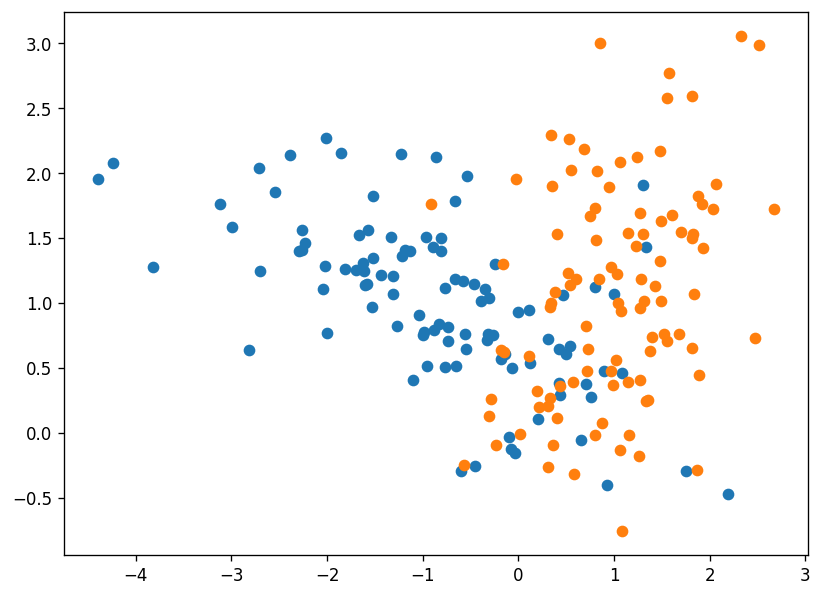

0.88

<Figure size 432x288 with 0 Axes>

In [42]:
# Assets generation

X = np.load('X_lin_noise.npy')
y = np.load('y_lin_noise.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/lin_noise/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_noise/anim', iteration_level=True, p=1, n_iter=100)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron.score(X_test, y_test)

What if the dataset is not linearly separable? What if the positive and negative examples are mixed up like in the image below?  
  
![alt text](output/lin_noise/figure.png)  
  
Well, the perceptron algorithm will not be able to correctly classify all examples, but it will attempt to find a line that best separates them. In this example, our perceptron got a **88%** test accuracy. The animation frames below are updated after each iteration through the training examples.  
  
![alt text](output/lin_noise/anim.gif)

### Example 3 - Not linear at all

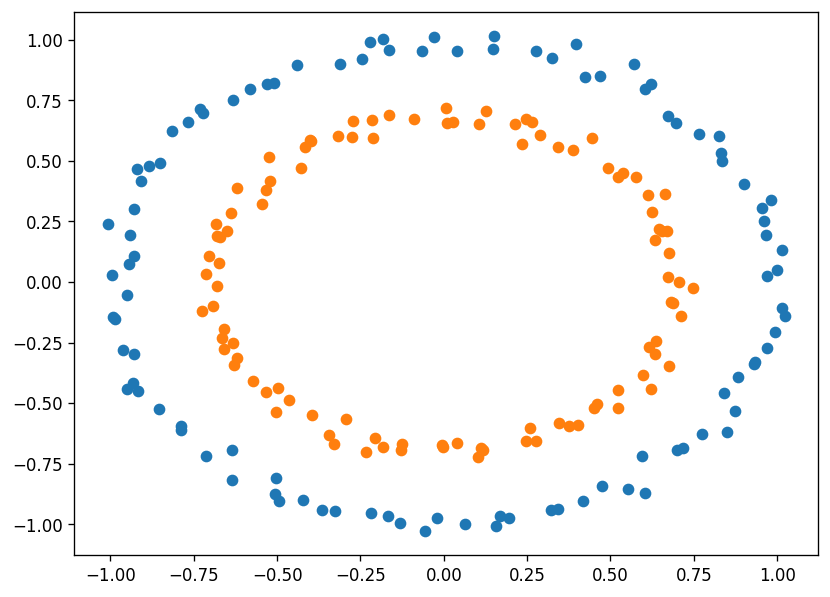

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


1.0

<Figure size 432x288 with 0 Axes>

In [46]:
# Assets generation

X = np.load('X_circles.npy')
y = np.load('y_circles.npy')

X = polynomial_features(X, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/circles/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)

perceptron = Perceptron()
perceptron.fit(X_train, y_train, n_iter=3)

perceptron.score(X_test, y_test)

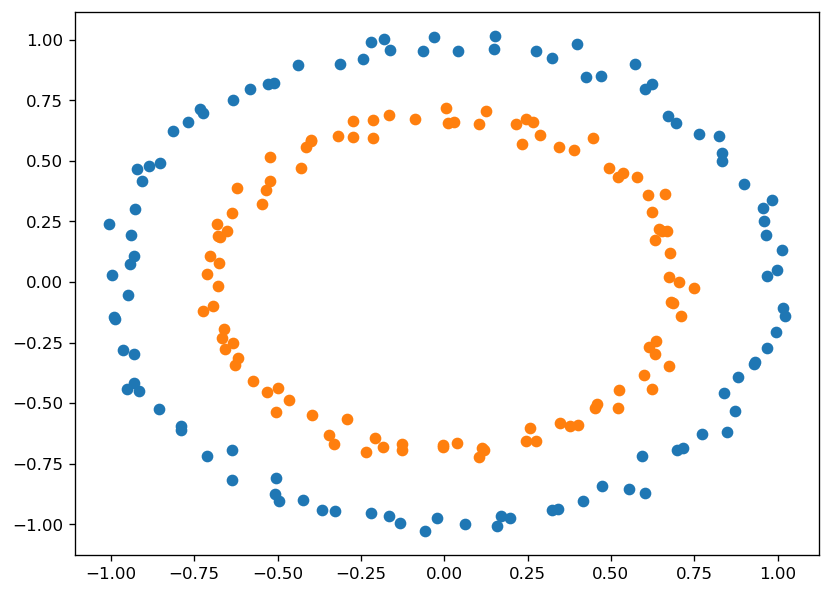

In [14]:
# Assets generation

X = np.load('X_circles.npy')
y = np.load('y_circles.npy')

X = polynomial_features(X, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/licenta/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

#perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)

perceptron = Perceptron()
perceptron.fit(X_train, y_train, n_iter=3)

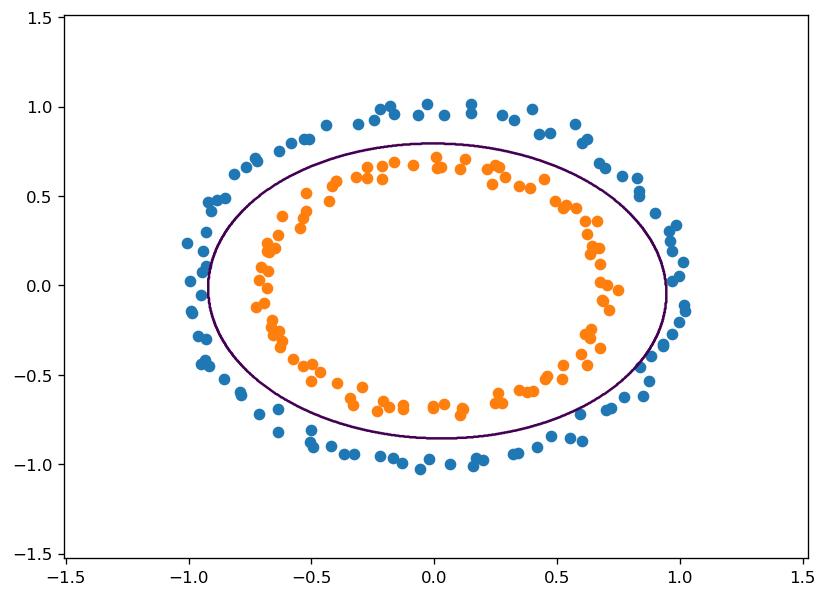

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plot_decision_boundary(ax, perceptron, X, 2)
plt.savefig('output/licenta/figure2.png')
plt.show()

What about the below dataset? (Generated using `X, y = make_circles(n_samples=200, noise=0.03, factor=0.7)`)  
  
![alt text](output/circles/figure.png)  
  
It is separable, but clearly not linear. So you may think that a perceptron would not be good for this task. But the thing about perceptron is that it's decision boundary is linear in terms of the **weights**, not necessary in terms of inputs. We can augment our input vectors **x** so that they contain non-linear functions of the original inputs. For example, in addition to the original inputs $x_1$ and $x_2$ we can add the terms $x_1^2$, $x_1x_2$, and $x_2^2$.  
  
$$
x = \begin{bmatrix}x_1\\x_2\end{bmatrix}\quad => \quad x = \begin{bmatrix}x_1\\x_2\\x_1^2\\x_1x_2\\x_2^2\end{bmatrix}
$$  
  
The `polynomial_features(X, p)` function below is able to transform the input matrix **X** into a matrix that contains as features all the terms of a polynomial of degree **p**. It makes use of the `polynom()` function which computes a list of indices that represent the columns to be multiplied for obtaining the p-order terms.  
  
```python
def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X, p):
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)
```
  
For our example we will add degree 2 terms as new features in the **X** matrix.  

```python
X = polynomial_features(X, 2)
```  
Now, let's see what happens during training with this transformed dataset:  
  
![alt text](output/circles/anim.gif)  
  
Note that for ploting we used only the original inputs in order to keep it 2D. The decision boundary is still linear in the augmented feature space which is 5D now. But when we plot that decision boundary projected onto the original feature space it has a non-linear shape.  
With this method our perceptron algorithm was able to correctly classify both training and testing examples without any modification of the algorithm itself. All we changed was the dataset.

With this feature augmentation method we are able to model very complex patterns in our data by using algorithms that were otherwise just linear.  
But, this method is not very efficient. Imagine what would happen if we had 1000 input features and we want to augment it with up to 10-degree polynomial terms.  
Fortunately, this problem can be avoided using something called **kernels**. But that's a topic for another article, I don't want to make this one too long.

I hope you found this information useful, and thanks for reading.

## Code used for data generation

In [ ]:
X, y = make_classification(n_features=2, n_classes=2, n_samples=200, n_redundant=0, n_clusters_per_class=1)
y = np.vectorize(lambda v: -1 if v == 0 else 1)(y)

In [ ]:
X, y = make_circles(n_samples=200, noise=0.03, factor=0.7)
y = np.vectorize(lambda v: -1 if v == 0 else 1)(y)

In [ ]:
def plot_data_points(X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    plt.scatter(X[neg_class, 0], X[neg_class, 1])
    plt.scatter(X[pos_class, 0], X[pos_class, 1])
    plt.show()

In [ ]:
plot_data_points(X, y)

In [ ]:
np.save('X_circles.npy', X)
np.save('y_circles.npy', y)